In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
snacks_df = pd.read_csv('./datasets/snacks.csv', dtype = { 'client_id': str })

In [46]:
snacks_df.head()

,country_region,office_department_city,description,area_name,warehouse_id,warehouse_city,category_id,category_name,brand_id,price_type,...,client_name,point_of_sale_name,distributor,date,units,devolution_units,currency,sale_amount,sale_discount,sale_devolution
0,Centro,Ibague,IBAGUE 1,SALADO,85228.0,IBAGUE,CAT1,Producto de Extrusion,M01,REGULAR,...,NaN,NaN,Tiendas,1/04/2014,39600,0,COP,"493,529.00","-93,769.56",0
1,Sur,Cali,TULUA,EL PRINCIPE,85205.0,TULUA,CAT1,Producto de Extrusion,M01,OFERTADO,...,NaN,NaN,Tiendas,1/04/2014,324,0,COP,"181,530.00","-32,675.40",0
2,Sur,Nariño,POPAYAN,MOTO CONQUISTA POPAYAN,85220.0,POPAYAN,CAT1,Producto de Extrusion,M01,OFERTADO,...,NaN,NaN,Tiendas,1/04/2014,36,0,COP,"20,170.00","-4,437.40",0
3,Sur,Nariño,POPAYAN,MOTO CONQUISTA POPAYAN,85220.0,POPAYAN,CAT1,Producto de Extrusion,M01,REGULAR,...,NaN,NaN,Tiendas,1/04/2014,73200,0,COP,"91,227.00","-20,069.98",0
4,Norte,Bucaramanga,FLORIDA,REPOSO,85230.0,BUCARAMANGA,CAT1,Producto de Extrusion,M01,OFERTADO,...,NaN,NaN,Tiendas,1/04/2014,3924,0,COP,"2,198,533.00","-395,736.97",0


In [47]:
snacks_df['country_region'].unique()

array([' Centro', ' Sur', ' Norte', 'Ventas al Exterior', 'Norte',
       'Centro', nan, 'Sur', 'Ventas Miscelaneas'], dtype=object)

In [48]:
snacks_df['country_region'] = snacks_df['country_region'].str.strip()
snacks_df['country_region'].unique()

array(['Centro', 'Sur', 'Norte', 'Ventas al Exterior', nan,
       'Ventas Miscelaneas'], dtype=object)

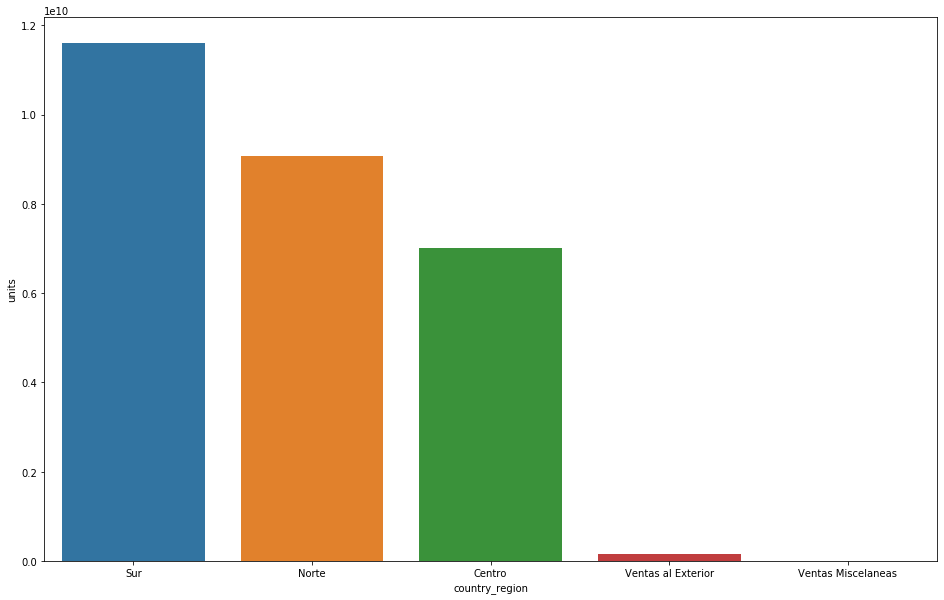

In [49]:
group = snacks_df.groupby('country_region')['units'].sum().reset_index(name='units').sort_values('units', ascending=False)

plt.figure(figsize=(16, 10))
sns.barplot(x='country_region', y='units', data=group)

In [50]:
clean_df = snacks_df[snacks_df['country_region'] == 'Sur']
clean_df.shape

(1213737, 26)

In [51]:
clean_df['category_name'].isna().sum()

101433

In [52]:
to_rename = {
    'pruduction_line': 'production_line',
    'office_department_city': 'office_name',
    'warehouse_city': 'warehouse_name'
}
clean_df = clean_df.rename(columns=to_rename)
clean_df.columns

Index(['country_region', 'office_name', 'description', 'area_name',
       'warehouse_id', 'warehouse_name', 'category_id', 'category_name',
       'brand_id', 'price_type', 'production_line', 'product_id', 'weight',
       'plant', 'client_id', 'flavor_name', 'client_name',
       'point_of_sale_name', 'distributor', 'date', 'units',
       'devolution_units', 'currency', 'sale_amount', 'sale_discount',
       'sale_devolution'],
      dtype='object')

In [53]:
# I want to remove: production_line, warehouse_id, area_name, weight, currency, sale_amount
clean_df = clean_df[clean_df['distributor'].notna()]
clean_df['distributor'].isna().any()

False

In [54]:
clean_df['incentive'] = clean_df['price_type'].apply(lambda x: True if x == 'OFERTADO' else False)

In [55]:
clean_df = clean_df.drop([
    'production_line',
    'warehouse_id',
    'area_name',
    'weight',
    'currency',
#     'sale_amount',
    'category_id',
    'plant',
    'client_id',
    'price_type',
    'country_region'
], axis=1)
clean_df.shape

(1213721, 17)

In [56]:
float_columns = ['sale_amount', 'sale_discount', 'sale_devolution']
for column in float_columns:
    clean_df[column] = clean_df[column].str.replace(',', '').astype(float)

In [57]:
clean_df.head()

,office_name,description,warehouse_name,category_name,brand_id,product_id,flavor_name,client_name,point_of_sale_name,distributor,date,units,devolution_units,sale_amount,sale_discount,sale_devolution,incentive
1,Cali,TULUA,TULUA,Producto de Extrusion,M01,53407164,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,324,0,181530.0,-32675.40,0.0,True
2,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,53407164,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,36,0,20170.0,-4437.40,0.0,True
3,Nariño,POPAYAN,POPAYAN,Producto de Extrusion,M01,53102174,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,73200,0,91227.0,-20069.98,0.0,False
8,Cali,AGUABLANCA - CALI,SUR,Producto de Extrusion,M01,53408215,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,1080,0,605100.0,-108918.43,0.0,True
10,Cali,AUTOSERVICIOS CALI,NORTE,Producto de Extrusion,M01,53408024,TRADICIONAL,NaN,NaN,Superficies Menores,1/04/2014,100,40,73280.0,-10992.00,-29312.0,True


In [58]:
clean_df['brand_id'].unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12', 'M13', 'M14', 'M16', 'M17', 'M18', 'M19',
       'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'Otras',
       'M28'], dtype=object)

In [59]:
brand_names = {
    'M01': 'Cheetos',
    'M02': 'Popcorn',
    'M03': 'Cheetos',
    'M08': 'Criollas',
    'M07': 'Ruffles',
    'M16': 'Todo en uno',
    'Otras': 'Dulces',
    'M27': 'Surtidas',
    'M25': 'Costillas',
    'M24': 'Choclos',
    'M11': 'Ruffles econo',
    'M20': 'Tortillitas',
    'M14': 'Criollas econo',
    'M18': 'Caleñas',
    'M17': 'Surtidas',
    'M23': 'Nachos',
    'M28': 'Fritas econo',
    'M13': 'Platanos econo',
    'M26': 'Costillas econo',
    'M09': 'Papas econo'
}

In [60]:
def name_brand(x):
    if x in brand_names.keys():
        return brand_names[x]
    else:
        return x

In [61]:
clean_df['brand_id'] = clean_df['brand_id'].apply(name_brand)

In [63]:
clean_df = clean_df.rename(columns={'brand_id': 'brand'})

In [65]:
clean_df[clean_df['category_name'].isna()]['brand'].unique()

array(['Dulces'], dtype=object)

In [68]:
clean_df['category_name'] = clean_df['category_name'].fillna('Dulces')

In [72]:
clean_df['warehouse_name'].unique()

array(['TULUA', 'POPAYAN', 'SUR', 'NORTE', 'PEREIRA', 'BUGA', 'ARMENIA',
       'PASTO', 'PALMIRA', 'NARIÑO', 'MANIZALES', 'ESPECIALES',
       'PRINCIPAL', nan, 'ITAGUI', 'BARRANQUILLA', 'CARTAGENA',
       'BUCARAMANGA'], dtype=object)

In [127]:
def get_warehouse_name(name):
    if name is np.nan:
        return name
    algo = clean_df[clean_df['description'].str.contains(name) | False].groupby('warehouse_name')['date'].count().reset_index().sort_values('date')
    if len(algo) == 0:
        return np.nan
    return algo.iloc[-1]['warehouse_name']

In [134]:
#clean_df[clean_df['warehouse_name'].isna()]['warehouse_name'] = clean_df[clean_df['warehouse_name'].isna()]['description'].apply(get_warehouse_name)

In [143]:
descriptions = clean_df[clean_df['warehouse_name'].isna()]['description'].unique()
desc_warehouse_dict = {}
for each in descriptions:
    desc_warehouse_dict[each] = get_warehouse_name(each)
desc_warehouse_dict

{'AUTOSERVICIOS MEDELLIN': 'SUR',
 'VENTA DIRECTA MEDELLIN': nan,
 'AUTOSERVICIOS PEREIRA': 'PEREIRA',
 'MAYORISTAS MEDELLIN': 'SUR',
 'AUTOSERVICIOS NARIÑO': 'PASTO',
 'AUTOSERVICIOS CALI': 'NORTE',
 'VIAJEROS SUR ': 'SUR',
 'MAYORISTAS CALI': 'NORTE',
 'INSTITUCIONAL MEDELLIN': 'SUR',
 'No Aplica': 'ARMENIA',
 'INSTITUCIONAL CALI': 'NORTE',
 'INSTITUCIONAL PEREIRA': 'PEREIRA',
 'VIAJEROS SUR MEKATO': 'SUR',
 'MAYORISTA MEDELLIN': 'SUR',
 'BELLO ORIENTE - MEDELLIN': 'NORTE',
 'BELEN': 'NORTE',
 'BELLO OCCIDENTE - MEDELLIN': 'NORTE',
 'ABURRA SUR': 'SUR',
 'CENTRO': 'SUR',
 'BELLO CENTRO': 'NORTE',
 'ABURRA OCCIDENTE': 'NORTE',
 'ITAGUI - MEDELLIN': 'SUR',
 'BONILLA MENESES, JHON JAIRO': 'NORTE',
 'ABURRA ORIENTE': 'NORTE',
 'IPIALES': 'NARIÑO',
 'PASTO': 'PASTO',
 'CHOCO': 'PEREIRA',
 'VIAJEROS NORTE ': 'NORTE'}

In [154]:
desc_warehouse_dict['VENTA DIRECTA MEDELLIN'] = 'SUR'

In [156]:
clean_df.loc[clean_df['warehouse_name'].isna(), 'warehouse_name'] = clean_df[clean_df['warehouse_name'].isna()]['description'].map(desc_warehouse_dict)

In [172]:
grp = clean_df.groupby('client_name')['point_of_sale_name'].unique()

In [173]:
for i, x in enumerate(grp):
    print(grp.index[i], len(x))

ALMACENES EXITO S.A. 246
ALMACENES LA 14 S.A. 26
CAJA COLOMBIANA DE SUBSIDIO FAMILIAR COLSUBSIDIO 5
CENCOSUD COLOMBIA S.A. 24
COLOMBIANA DE COMERCIO S.A. 9
MAKRO SUPERMAYORISTA S.A.S 5
PRICESMART COLOMBIA S.A.S. 4
SUPERTIENDAS Y DROGUERIAS OLIMPICA S.A. 101


In [168]:
clean_df = clean_df.drop([
    'description',
], axis=1)

In [169]:
clean_df.head()

,office_name,warehouse_name,category_name,brand,product_id,flavor_name,client_name,point_of_sale_name,distributor,date,units,devolution_units,sale_amount,sale_discount,sale_devolution,incentive
1,Cali,TULUA,Producto de Extrusion,Cheetos,53407164,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,324,0,181530.0,-32675.40,0.0,True
2,Nariño,POPAYAN,Producto de Extrusion,Cheetos,53407164,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,36,0,20170.0,-4437.40,0.0,True
3,Nariño,POPAYAN,Producto de Extrusion,Cheetos,53102174,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,73200,0,91227.0,-20069.98,0.0,False
8,Cali,SUR,Producto de Extrusion,Cheetos,53408215,TRADICIONAL,NaN,NaN,Tiendas,1/04/2014,1080,0,605100.0,-108918.43,0.0,True
10,Cali,NORTE,Producto de Extrusion,Cheetos,53408024,TRADICIONAL,NaN,NaN,Superficies Menores,1/04/2014,100,40,73280.0,-10992.00,-29312.0,True


In [16]:
#clean_df.to_csv('./datasets/clean_snacks.csv', encoding='utf-8', index=False)